##__PSEi Companies Data Analysis__

In this file we will extract stock data from the companies included in the __Philippines Stock Exchange Index__ (PSEi). These companies are the top 30 listed companies, chosen to represent the general movement of the PSE.

I have prepared a file called <b>scraper.py</b> in order to extract the current stock data of each companies in the last 30 days. It will create a CSV file named "psei_data.csv". It will take some time to scrape the data.

In [1]:
# %run scraper.py

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#importing our CSV file into pandas 

df = pd.read_csv("psei_data_v2.csv", index_col=False)


__Data Cleaning and Preparation__
> We will prepare our data for analysis, so we have to clean our data to prepare. Here we will correct the data types
of columns, replace inconsitent or unreadable text, check for null or duplicate values, etc.

In [4]:
#Checking the top of the dataset
df.head()

,company,date,open,high,low,close,average,volume,value,out_shares,sector,sub_sector
0,AC,"Feb 02, 2024",678.00,690.00,672.00,672.00,678.14,"238,090","161,458,025.00","619,807,425",HOLDING FIRMS,HOLDING FIRMS
1,AC,"Feb 01, 2024",672.50,679.00,661.50,678.00,672.18,"164,310","110,446,420.00","619,807,425",HOLDING FIRMS,HOLDING FIRMS
2,AC,"Jan 31, 2024",661.00,683.50,661.00,679.00,678.87,"389,530","264,440,035.00","619,807,425",HOLDING FIRMS,HOLDING FIRMS
3,AC,"Jan 30, 2024",662.00,669.00,660.00,660.00,662.89,"264,090","175,063,580.00","619,807,425",HOLDING FIRMS,HOLDING FIRMS
4,AC,"Jan 29, 2024",675.00,681.00,661.00,661.00,664.42,"275,040","182,742,380.00","619,807,425",HOLDING FIRMS,HOLDING FIRMS


In [5]:
#Checking the bottom of the dataset
df.tail()

,company,date,open,high,low,close,average,volume,value,out_shares,sector,sub_sector
895,WLCON,"Dec 28, 2023",20.60,21.20,20.60,21.20,20.99,"76,100","1,597,000.00","4,099,724,116",SERVICES,RETAIL
896,WLCON,"Dec 27, 2023",21.50,21.60,20.60,20.60,21.13,"1,993,400","42,122,765.00","4,099,724,116",SERVICES,RETAIL
897,WLCON,"Dec 22, 2023",21.20,21.50,21.00,21.50,21.35,"246,300","5,257,770.00","4,099,724,116",SERVICES,RETAIL
898,WLCON,"Dec 21, 2023",21.80,21.80,20.95,21.30,21.26,"1,462,800","31,099,935.00","4,099,724,116",SERVICES,RETAIL
899,WLCON,"Dec 20, 2023",20.40,22.40,20.15,22.00,21.63,"1,600,700","34,625,925.00","4,099,724,116",SERVICES,RETAIL


In [6]:
# Quick info on each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   company     900 non-null    object
 1   date        900 non-null    object
 2   open        900 non-null    object
 3   high        900 non-null    object
 4   low         900 non-null    object
 5   close       900 non-null    object
 6   average     900 non-null    object
 7   volume      900 non-null    object
 8   value       900 non-null    object
 9   out_shares  900 non-null    object
 10  sector      900 non-null    object
 11  sub_sector  900 non-null    object
dtypes: object(12)
memory usage: 84.5+ KB


In [7]:
#Descriptive Statistics of the numerical columns
df.describe()

,company,date,open,high,low,close,average,volume,value,out_shares,sector,sub_sector
count,900,900,900,900,900,900,900,900,900,900,900,900
unique,30,30,630,620,630,638,807,896,900,30,6,11
top,AC,"Feb 02, 2024",8.50,21.00,33.25,31.00,11.59,"195,000","161,458,025.00","619,807,425",HOLDING FIRMS,HOLDING FIRMS
freq,30,30,6,7,5,9,5,2,1,30,270,270


In [8]:
#Checking number of rows and columns

df.shape

(900, 12)

In [9]:
#check if there are any duplicates

df.duplicated().sum()

0

In [10]:
#check if any column has any null values

df.isnull().sum()

company       0
date          0
open          0
high          0
low           0
close         0
average       0
volume        0
value         0
out_shares    0
sector        0
sub_sector    0
dtype: int64

In [11]:
#based on the df.info() above, all our columns are catergorical, meaning the numerical columms
#red as text, we will change all number columns to float64 and date column to datetime
num_cols = ["open", "high", "low", "close", "average", "volume", "value", 'out_shares']
for col in num_cols:
    df[col] = df[col].astype('str').str.replace(",", "")
    df[col] = df[col].astype("float64")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   company     900 non-null    object 
 1   date        900 non-null    object 
 2   open        900 non-null    float64
 3   high        900 non-null    float64
 4   low         900 non-null    float64
 5   close       900 non-null    float64
 6   average     900 non-null    float64
 7   volume      900 non-null    float64
 8   value       900 non-null    float64
 9   out_shares  900 non-null    float64
 10  sector      900 non-null    object 
 11  sub_sector  900 non-null    object 
dtypes: float64(8), object(4)
memory usage: 84.5+ KB


In [12]:
# Change date column to datetime

df['date'] = pd.to_datetime(df['date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   company     900 non-null    object        
 1   date        900 non-null    datetime64[ns]
 2   open        900 non-null    float64       
 3   high        900 non-null    float64       
 4   low         900 non-null    float64       
 5   close       900 non-null    float64       
 6   average     900 non-null    float64       
 7   volume      900 non-null    float64       
 8   value       900 non-null    float64       
 9   out_shares  900 non-null    float64       
 10  sector      900 non-null    object        
 11  sub_sector  900 non-null    object        
dtypes: datetime64[ns](1), float64(8), object(3)
memory usage: 84.5+ KB


In [13]:
#converting all categorical columns to string data type

str_cols = ["company", "sector", "sub_sector"]
for col in str_cols:
    df[col] = df[col].astype('string')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   company     900 non-null    string        
 1   date        900 non-null    datetime64[ns]
 2   open        900 non-null    float64       
 3   high        900 non-null    float64       
 4   low         900 non-null    float64       
 5   close       900 non-null    float64       
 6   average     900 non-null    float64       
 7   volume      900 non-null    float64       
 8   value       900 non-null    float64       
 9   out_shares  900 non-null    float64       
 10  sector      900 non-null    string        
 11  sub_sector  900 non-null    string        
dtypes: datetime64[ns](1), float64(8), string(3)
memory usage: 84.5 KB


In [14]:
#Check the uniques entries for each categorical columns

df['company'].unique()

<StringArray>
[   'AC',  'ACEN',   'AEV',   'AGI',   'ALI',   'BDO', 'BLOOM',   'BPI',
  'CNPF', 'CNVRG',   'DMC',   'EMI',   'GLO', 'GTCAP',   'ICT',   'JFC',
   'JGS',   'LTG',   'MBT',   'MER', 'MONDE',  'NIKL', 'PGOLD',   'SCC',
    'SM',   'SMC',  'SMPH',   'TEL',   'URC', 'WLCON']
Length: 30, dtype: string

In [15]:
df['sector'].value_counts()

sector
HOLDING FIRMS       270
INDUSTRIAL          240
SERVICES            210
FINANCIALS           90
PROPERTY             60
MINING &amp; OIL     30
Name: count, dtype: Int64

In [16]:
df['sub_sector'].value_counts()

sub_sector
HOLDING FIRMS                       270
FOOD, BEVERAGE &amp; TOBACCO        150
ELEC., ENERGY, POWER &amp; WATER     90
BANKS                                90
PROPERTY                             60
TELECOMMUNICATIONS                   60
RETAIL                               60
CASINOS &amp; GAMING                 30
INFORMATION TECHNOLOGY               30
TRANSPORTATION SERVICES              30
MINING                               30
Name: count, dtype: Int64

In [17]:
# We will replace that '&amp' with "AND" to make it readable

df['sub_sector'] = df['sub_sector'].str.replace('&amp;', "AND")
df['sector'] = df['sector'].str.replace('&amp;', "AND")
df['sub_sector'].value_counts()

sub_sector
HOLDING FIRMS                     270
FOOD, BEVERAGE AND TOBACCO        150
ELEC., ENERGY, POWER AND WATER     90
BANKS                              90
PROPERTY                           60
TELECOMMUNICATIONS                 60
RETAIL                             60
CASINOS AND GAMING                 30
INFORMATION TECHNOLOGY             30
TRANSPORTATION SERVICES            30
MINING                             30
Name: count, dtype: Int64

In [18]:
df['sector'].value_counts()

sector
HOLDING FIRMS     270
INDUSTRIAL        240
SERVICES          210
FINANCIALS         90
PROPERTY           60
MINING AND OIL     30
Name: count, dtype: Int64

__Exploratory Data Analysis__
> We will try to get insights in our current data, here we can try to answer some question that we are
curious about. I have listed some question that maybe we could answer with our dataset.
- What companies have the highest market cap(valuation) in the PSEi companies?
- What sectors and sub_sectors are the PSEi companies are in?
- What companies had the greatest increase in value vs last month?
- What companies had beaten the PSEi performance for the month (Dec 26 - Jan 26)?

__Market Cap Analysis__
> What companies have the highest market cap(valuation) in the PSEi companies? Companies with larger market capitalization are often safer investments as they represent more established companies with generally longer history in business. For our market capitalization formula, we will use the closing price times the outstanding shares of the company

In [19]:
df["market_cap"] = df["close"] * df["out_shares"]
pd.options.display.float_format = '{:,.2f}'.format

In [20]:
df_top_ten = df.loc[(df.date == "2024-02-02")]
df_top_ten.head()

,company,date,open,high,low,close,average,volume,value,out_shares,sector,sub_sector,market_cap
0,AC,2024-02-02,678.00,690.00,672.00,672.00,678.14,"238,090.00","161,458,025.00","619,807,425.00",HOLDING FIRMS,HOLDING FIRMS,"416,510,589,600.00"
30,ACEN,2024-02-02,4.25,4.38,4.25,4.35,4.34,"22,564,000.00","97,919,190.00","39,677,394,773.00",INDUSTRIAL,"ELEC., ENERGY, POWER AND WATER","172,596,667,262.55"
60,AEV,2024-02-02,48.30,48.90,47.50,47.50,47.56,"2,253,000.00","107,150,625.00","5,619,785,757.00",HOLDING FIRMS,HOLDING FIRMS,"266,939,823,457.50"
90,AGI,2024-02-02,11.46,11.54,11.38,11.54,11.53,"4,200,500.00","48,448,272.00","8,982,039,179.00",HOLDING FIRMS,HOLDING FIRMS,"103,652,732,125.66"
120,ALI,2024-02-02,33.30,34.25,33.20,33.50,33.68,"5,462,600.00","183,977,740.00","14,942,175,713.00",PROPERTY,PROPERTY,"500,562,886,385.50"


In [21]:
#Check the top ten of the PSEi Market Cap
df_top_ten.sort_values("market_cap", ascending=False).head(10)[["company", "market_cap"]]

,company,market_cap
720,SM,"1,116,929,349,212.00"
780,SMPH,"970,342,184,918.40"
150,BDO,"782,351,059,644.00"
210,BPI,"610,593,268,956.30"
420,ICT,"503,933,173,544.00"
120,ALI,"500,562,886,385.50"
0,AC,"416,510,589,600.00"
570,MER,"409,136,829,915.00"
330,EMI,"322,597,660,379.00"
480,JGS,"297,078,854,491.00"


In [22]:
#Check the lowest ten of the PSEi Market Cap
df_top_ten.sort_values("market_cap", ascending=False).tail(10)[["company", "market_cap"]]

,company,market_cap
390,GTCAP,"141,549,615,952.50"
690,SCC,"132,617,085,744.00"
180,BLOOM,"129,620,375,319.96"
240,CNPF,"120,791,018,089.50"
90,AGI,"103,652,732,125.66"
510,LTG,"102,803,194,445.50"
870,WLCON,"88,349,054,699.80"
660,PGOLD,"78,915,770,651.00"
270,CNVRG,"68,887,112,618.28"
630,NIKL,"66,451,466,698.38"


__Industry Analysis__
> What sectors and sub_sectors are the PSEi companies are in? We want to see what sectors were companies are included in as we want to diversify our investment to different sectors as it can actually improve your potential returns and stabilize your results

In [23]:
df.sector.value_counts()

sector
HOLDING FIRMS     270
INDUSTRIAL        240
SERVICES          210
FINANCIALS         90
PROPERTY           60
MINING AND OIL     30
Name: count, dtype: Int64

In [24]:
df_sectors = df.sub_sector.value_counts()/30
df.sub_sector.value_counts()/30

sub_sector
HOLDING FIRMS                    9.00
FOOD, BEVERAGE AND TOBACCO       5.00
ELEC., ENERGY, POWER AND WATER   3.00
BANKS                            3.00
PROPERTY                         2.00
TELECOMMUNICATIONS               2.00
RETAIL                           2.00
CASINOS AND GAMING               1.00
INFORMATION TECHNOLOGY           1.00
TRANSPORTATION SERVICES          1.00
MINING                           1.00
Name: count, dtype: Float64

__Stock Performance Analysis__
> What companies had the greatest increase in value vs last month? We want to see what companies were <br>
bullish from last month up to now, here we'll see what companies were performing and would be ideal <br>
stock for investment.

In [25]:
df_stock_today = df[df.date == "2024-02-02"].reset_index(drop=True)
df_stock_lm_valuation = df[df.date == "2024-01-02"].reset_index(drop=True)


In [26]:
df_stock_today['vs_last_month'] = (df_stock_today["close"] - df_stock_lm_valuation["close"])/df_stock_lm_valuation["close"] 
df_stock_today.vs_last_month.round(2).sort_values(ascending=False)

5     0.16
6     0.13
9     0.12
20    0.11
7     0.10
13    0.10
8     0.10
10    0.10
18    0.07
26    0.04
24    0.04
17    0.04
3     0.03
23    0.03
15    0.02
22    0.01
27    0.01
1     0.01
12   -0.00
16   -0.01
25   -0.02
29   -0.02
11   -0.02
14   -0.03
4    -0.03
2    -0.05
0    -0.06
21   -0.09
19   -0.09
28   -0.11
Name: vs_last_month, dtype: float64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3152\2969861299.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_yticklabels(ylabels)


[Text(0, -0.15000000000000002, '-0.15%'),
 Text(0, -0.10000000000000002, '-0.10%'),
 Text(0, -0.05000000000000002, '-0.05%'),
 Text(0, 0.0, '0.00%'),
 Text(0, 0.04999999999999999, '0.05%'),
 Text(0, 0.09999999999999998, '0.10%'),
 Text(0, 0.15000000000000002, '0.15%'),
 Text(0, 0.2, '0.20%')]

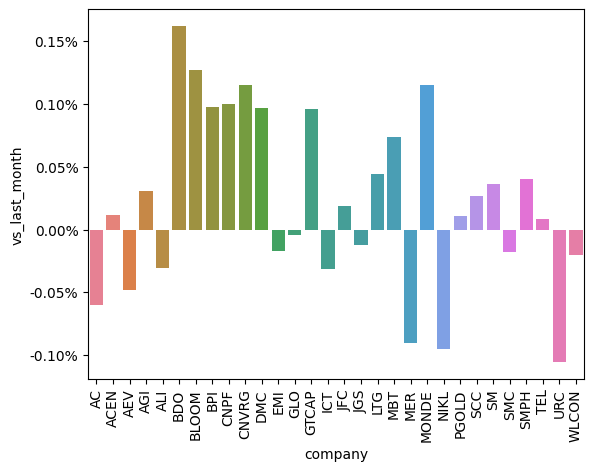

In [27]:
g = sns.barplot(data=df_stock_today, x="company", y="vs_last_month", hue="company")
plt.xticks(rotation=90)
ylabels = ['{:.2f}'.format(x) + '%' for x in g.get_yticks()]
g.set_yticklabels(ylabels)


__VS PSEi Performance Analysis__
> What companies has beaten the PSEi performance for the month? Beating the PSEi is a big indicator of
performing stocks. Beating the PSEi technically means beating the top companies of the Philippines and that's a big sign of succes for stock picking

In [28]:
psei_jan_02 = 6554.04
psei_feb_02 = 6707.25
print(str(round(((psei_feb_02 - psei_jan_02)/psei_jan_02)*100, 2)) + "%")

2.34%


In [29]:
psei_perf = 0.0234
psei_row = pd.DataFrame({'company': "PSEi", 'date': df_stock_today.head(1).date, 'open': 0, 'high': 0, 'low': 0, 'close': 0, 'average': 0, 'volume': 0,
       'value': 0, 'sector': "None", 'sub_sector': "None", 'vs_last_month' : psei_perf})
df_stock_today = pd.concat([df_stock_today, psei_row])


In [30]:
df_stock_today.tail()

,company,date,open,high,low,close,average,volume,value,out_shares,sector,sub_sector,market_cap,vs_last_month
26,SMPH,2024-02-02,34.00,34.60,33.60,33.60,33.87,"9,709,000.00","328,865,505.00","28,879,231,694.00",PROPERTY,PROPERTY,"970,342,184,918.40",0.04
27,TEL,2024-02-02,"1,260.00","1,286.00","1,260.00","1,286.00","1,281.39","44,990.00","57,649,770.00","216,055,775.00",SERVICES,TELECOMMUNICATIONS,"277,847,726,650.00",0.01
28,URC,2024-02-02,110.90,111.70,110.70,110.90,111.05,"4,235,680.00","470,359,505.00","2,176,667,968.00",INDUSTRIAL,"FOOD, BEVERAGE AND TOBACCO","241,392,477,651.20",-0.11
29,WLCON,2024-02-02,21.55,22.00,21.50,21.55,21.72,"1,215,700.00","26,401,505.00","4,099,724,116.00",SERVICES,RETAIL,"88,349,054,699.80",-0.02
0,PSEi,2024-02-02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,None,None,NaN,0.02


C:\Users\Administrator\AppData\Local\Temp\ipykernel_3152\2969861299.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_yticklabels(ylabels)


[Text(0, -0.15000000000000002, '-0.15%'),
 Text(0, -0.10000000000000002, '-0.10%'),
 Text(0, -0.05000000000000002, '-0.05%'),
 Text(0, 0.0, '0.00%'),
 Text(0, 0.04999999999999999, '0.05%'),
 Text(0, 0.09999999999999998, '0.10%'),
 Text(0, 0.15000000000000002, '0.15%'),
 Text(0, 0.2, '0.20%')]

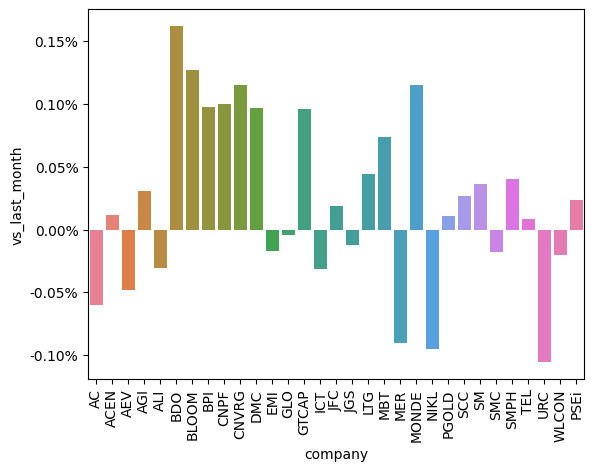

In [31]:
g = sns.barplot(data=df_stock_today, x="company", y="vs_last_month", hue="company")
plt.xticks(rotation=90)
ylabels = ['{:.2f}'.format(x) + '%' for x in g.get_yticks()]
g.set_yticklabels(ylabels)
